<a href="https://colab.research.google.com/github/jpescobarn/Modelado-y-Simulaci-n-/blob/master/Ecuaci%C3%B3n_de_Lorenz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ecuación de Lorenz
## Juan Pablo Escobar Naranjo 

El atractor de Lorenz es un concepto introducido por Edward Lorenz en 1963. Se trata de un sistema dinámico determinista tridimensional no lineal derivado de las ecuaciones simplificadas de rollos de convección que se producen en las ecuaciones dinámicas de la atmósfera terrestre.

$$ \frac{dx}{dt}=\sigma(y-x) $$
$$ \frac{dy}{dt}=x(\rho-z)-y $$
$$ \frac{dz}{dt}=xy-\beta x $$


Este sistema fué encontrado por E. Lorenz en el año 1963, el objetivo que Lorenz
tenía, era el de, mediante este sistema, poder predecir el clima. Los resultados no fueron óptimos para éstos fines, sin embargo, su estudio aportó mucha información a la matemática, ya que fue el primer sistema tridimensional autónomo en el cual se encontró un atractor caótico, conocido como “La Mariposa de Lorenz”. En la familia generalizada de sistemas tipo Lorenz, propuesta por Vanecek y Chelikovsky, el sistema de Lorenz cumple con:

$$a_{12}a_{21}>0$$ 

El sistema de Lorenz está dado por el siguiente sistema de ecuaciones diferenciales:

$$\dot{x}_1=ax_2-ax_1$$
$$\dot{x}_2=cx_1-x_1x_3-x_2$$
$$\dot{x}_3=x_1x_2-bx_3$$ 

donde $a$,$b$,$c >0$.


In [5]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import time
from mpl_toolkits.mplot3d import Axes3D

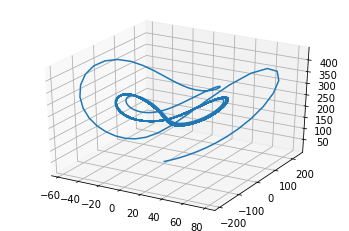

In [6]:
def lorenz (t,y,sigma,rho,beta):
  return [sigma*(y[1]-y[0]),y[0]*(rho-y[2])-y[1],y[0]*y[1]-beta*y[2]]

a,b=0,50
t= np.linspace(a,b,10000)
y0=[0.1,0.1,0.1]

sol=solve_ivp(lorenz,[a,b],y0,args=(10,230,8/3),t_eval=t)

ax = plt.axes(projection='3d')
ax.plot3D(sol.y[0], sol.y[1], sol.y[2])
plt.show()

## Bifurcaciones 

time= 221.43913100000003


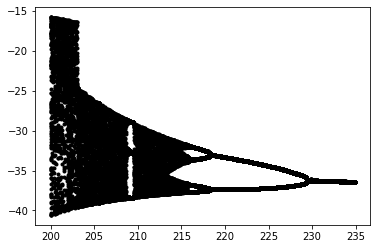

In [24]:
def lorenz (t,y,sigma,rho,beta):
  return [sigma*(y[1]-y[0]),y[0]*(rho-y[2])-y[1],y[0]*y[1]-beta*y[2]]

def event_lorenz (t,y,sigma,rho,beta):
  return y[0]+y[1]
  
# event_lorenz.terminal=True
event_lorenz.direction=-1

a,b=0,50
t= np.linspace(a,b,10000)
y0=[0.1,0.1,0.1]
tic=time.clock()
for r in np.arange(200,235,0.1):
  sol=solve_ivp(lorenz,[a,b],y0,args=(10,r,8/3),t_eval=t,events=event_lorenz,rtol=1e-4,atol=1e-7)
  k=sol.y_events[0]

  for i in range(len(sol.t_events[0])):
    if sol.t_events[0][i]>20:
      plt.plot(r,sol.y_events[0][i,1],".",color="black")
  y0=sol.y[:,-1]
toc=time.clock()
print("time=",toc-tic)

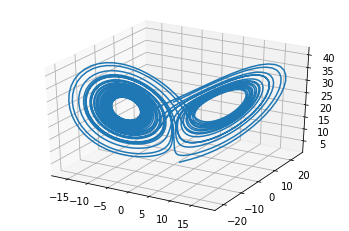

In [21]:
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

# Ejemplo

rho = 25
sigma = 10
beta = 8/3 

def f(estado, t):
    x, y, z = estado  # Desempaqueta el vector de estado
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivadas

estado_0 = [1.0, 1.0, 1.0]
t = np.arange(0.0, 40.0, 0.01)

estados = odeint(f, estado_0, t)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(estados[:, 0], estados[:, 1], estados[:, 2])
plt.show()